## Import thư viện
Import các thư viện cần thiết cho phân tích dữ liệu, machine learning, và visualization

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Tải dữ liệu
Tải dữ liệu từ file Excel chứa thông tin sinh viên

In [2]:
dataFrame = pd.read_excel(r'C:\Users\Lapto\OneDrive\Desktop\Recommend Major 2\Recommend Major\Data\students.xlsx')

## Hiển thị dữ liệu gốc
In ra dữ liệu gốc để xem tổng quan

In [3]:
print('Original data:')
dataFrame.head()

Original data:


,MSSV,Họ tên,Học lực,Lập trình C,Cấu trúc dữ liệu và giải thuật,Cơ sở dữ liệu,Toán cao cấp,Mạng máy tính,Hệ điều hành,Tiếng Anh P1,Trang yêu thích,Nhóm tham gia
0,1671020351,Lê Văn Việt,Giỏi,9.7,9.4,8.8,10.0,9.9,9.8,8.4,Hack The Box; InfoSec VN; Cyber Security Việt ...,Ethical Hacking; Pentest Group; Cyber Security VN
1,1671020169,Phạm Đăng Khương,Giỏi,9.3,8.3,9.3,9.2,8.3,9.6,9.6,Offensive Security; InfoSec VN; Hack The Box; ...,WhiteHat Community; Pentest Group; Ethical Hac...
2,1671020207,Vũ Đức Minh,Khá,5.9,6.3,5.9,5.9,5.0,5.4,6.4,Kaggle; Google AI; TensorFlow; Deep Learning C...,Deep Learning Group; Machine Learning Việt Nam...
3,1671020208,Ngô Thị Mừng,Khá,6.0,6.5,5.4,5.4,5.3,5.1,6.2,AWS User Group VN; Cloud Engineer Network; Doc...,Docker Hub; Cloud Engineer VN; CI/CD Automatio...
4,1671020113,Trần Minh Hiếu,Khá,6.5,5.0,5.8,5.5,5.1,5.2,5.7,TensorFlow; Google AI; AI Vietnam; Machine Lea...,AI Researchers; Python VN; Data Analytics VN; ...


## Định nghĩa cột điểm số
Xác định các cột chứa điểm số môn học.

In [4]:
scoreColumns = ['Lập trình C', 'Cấu trúc dữ liệu và giải thuật', 'Cơ sở dữ liệu',
                'Toán cao cấp', 'Mạng máy tính', 'Hệ điều hành', 'Tiếng Anh P1']

In [5]:
print(dataFrame.isnull().sum())

MSSV                              0
Họ tên                            0
Học lực                           0
Lập trình C                       0
Cấu trúc dữ liệu và giải thuật    0
Cơ sở dữ liệu                     0
Toán cao cấp                      0
Mạng máy tính                     0
Hệ điều hành                      0
Tiếng Anh P1                      0
Trang yêu thích                   0
Nhóm tham gia                     0
dtype: int64


In [6]:
dataFrame[scoreColumns] = dataFrame[scoreColumns].fillna(dataFrame[scoreColumns].mean())

In [7]:
#print('\nFeatures shape after preprocessing:', features.shape)

In [8]:
scaler = StandardScaler()
dataFrame[scoreColumns] = scaler.fit_transform(dataFrame[scoreColumns])

In [9]:
dataFrame['Combined Interests'] = dataFrame['Trang yêu thích'] + '; ' + dataFrame['Nhóm tham gia']

In [10]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=0.95)
features = tfidf.fit_transform(dataFrame['Combined Interests']).toarray()

In [11]:
pca = PCA(n_components=20)
reduced_features = pca.fit_transform(features)

In [12]:
print('Summary statistics:')
print(dataFrame[scoreColumns].describe())

Summary statistics:
        Lập trình C  Cấu trúc dữ liệu và giải thuật  Cơ sở dữ liệu  \
count  4.900000e+01                    4.900000e+01   4.900000e+01   
mean  -1.721979e-16                    3.353327e-16   4.123686e-16   
std    1.010363e+00                    1.010363e+00   1.010363e+00   
min   -2.036312e+00                   -2.239814e+00  -2.117979e+00   
25%   -6.565860e-01                   -4.728051e-01  -7.499855e-01   
50%    9.599210e-02                    5.075309e-02   5.837451e-02   
75%    7.231405e-01                    7.052008e-01   8.667345e-01   
max    1.977437e+00                    1.948651e+00   1.799458e+00   

       Toán cao cấp  Mạng máy tính  Hệ điều hành  Tiếng Anh P1  
count  4.900000e+01   4.900000e+01  4.900000e+01  4.900000e+01  
mean  -9.063045e-18  -4.803414e-16  9.969350e-17 -3.761164e-16  
std    1.010363e+00   1.010363e+00  1.010363e+00  1.010363e+00  
min   -1.932470e+00  -1.706504e+00 -2.015350e+00 -2.177303e+00  
25%   -7.388857e-01  -8.

In [13]:
correlationMatrix = dataFrame[scoreColumns].corr()
print('\nCorrelation matrix:')
print(correlationMatrix)


Correlation matrix:
                                Lập trình C  Cấu trúc dữ liệu và giải thuật  \
Lập trình C                        1.000000                        0.912745   
Cấu trúc dữ liệu và giải thuật     0.912745                        1.000000   
Cơ sở dữ liệu                      0.923561                        0.918562   
Toán cao cấp                       0.926709                        0.886429   
Mạng máy tính                      0.928193                        0.905970   
Hệ điều hành                       0.931312                        0.925417   
Tiếng Anh P1                       0.953235                        0.921369   

                                Cơ sở dữ liệu  Toán cao cấp  Mạng máy tính  \
Lập trình C                          0.923561      0.926709       0.928193   
Cấu trúc dữ liệu và giải thuật       0.918562      0.886429       0.905970   
Cơ sở dữ liệu                        1.000000      0.949194       0.911385   
Toán cao cấp                      

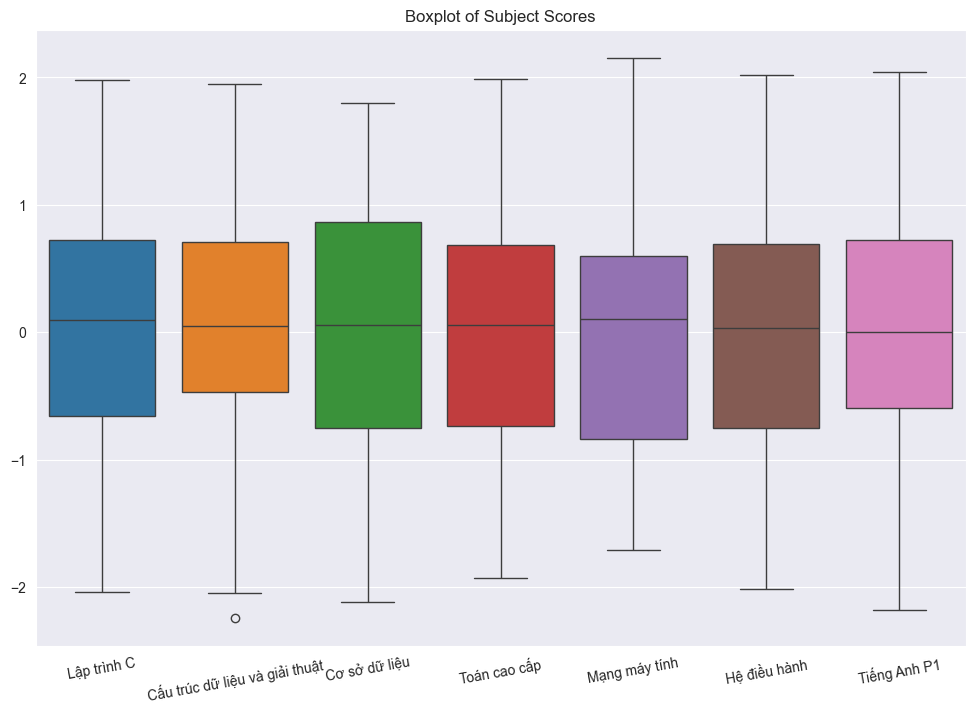

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataFrame[scoreColumns])
plt.title('Boxplot of Subject Scores')
plt.xticks(rotation=10)
plt.show()

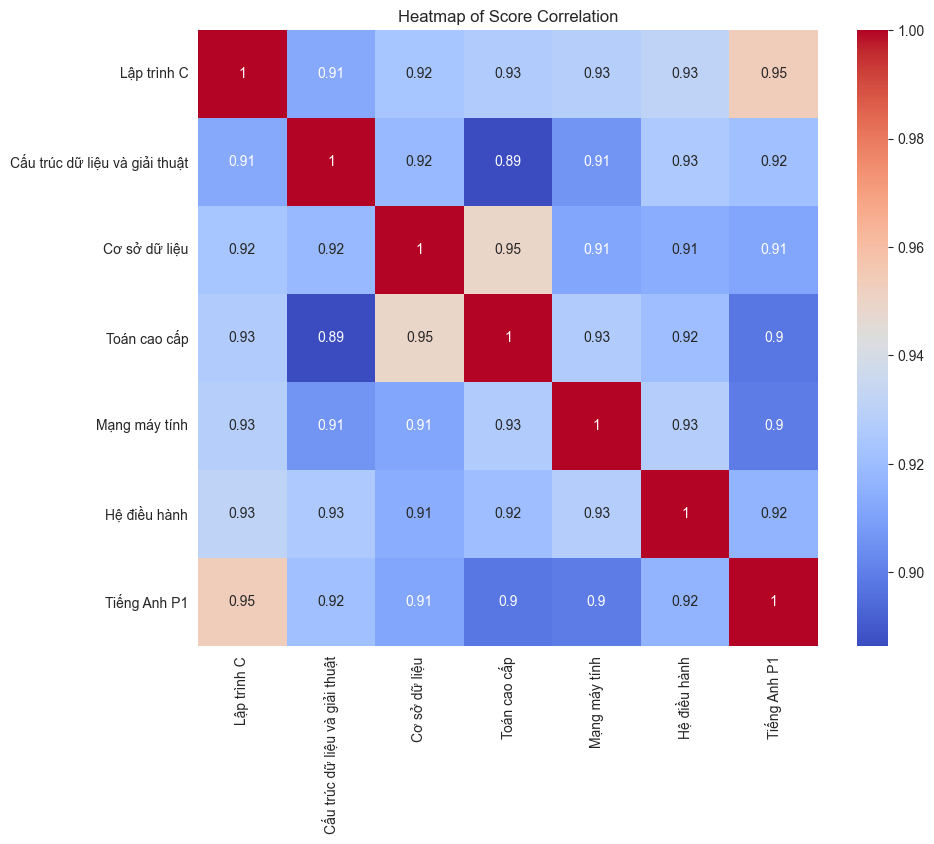

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Score Correlation')
plt.show()

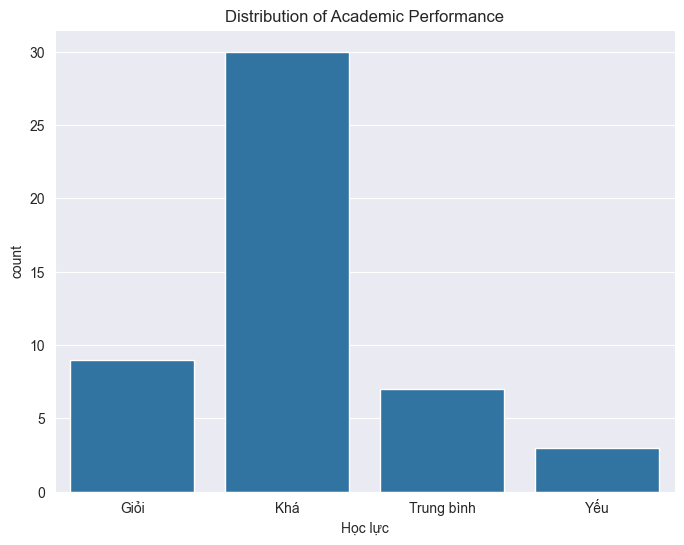

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Học lực', data=dataFrame)
plt.title('Distribution of Academic Performance')
plt.show()

In [17]:
from wordcloud import WordCloud

favorite_pages = ' '.join(dataFrame['Trang yêu thích'].astype(str).str.replace(';', ' ').fillna(''))
joined_groups = ' '.join(dataFrame['Nhóm tham gia'].astype(str).str.replace(';', ' ').fillna(''))

wordcloud_pages = WordCloud(width=800, height=400, background_color='white').generate(favorite_pages)
wordcloud_groups = WordCloud(width=800, height=400, background_color='white').generate(joined_groups)

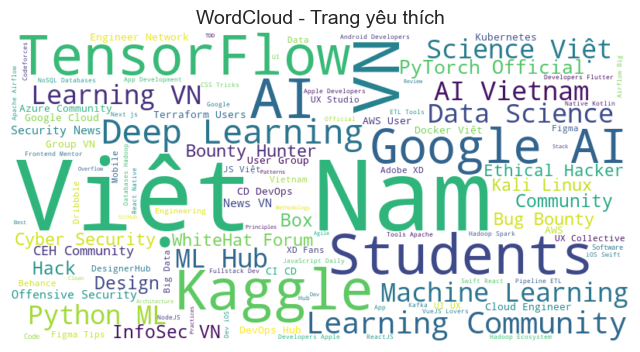

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_pages, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Trang yêu thích', fontsize=14)
plt.show()

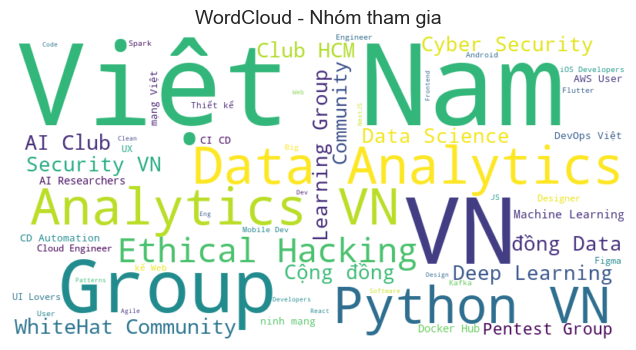

In [19]:
 plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_groups, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Nhóm tham gia', fontsize=14)
plt.show()

In [20]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(reduced_features)

In [21]:
hierarchical = AgglomerativeClustering(n_clusters=8, metric='cosine', linkage='average')
hierarchical_labels = hierarchical.fit_predict(reduced_features)

In [22]:
cosine_dist = pairwise_distances(reduced_features, metric='cosine')
dbscan = DBSCAN(eps=0.3, min_samples=3, metric='precomputed')
dbscan_labels = dbscan.fit_predict(cosine_dist)

In [23]:
def valid_silhouette(X, labels, metric='euclidean'):
    unique_labels = len(set(labels))
    if 1 < unique_labels < len(labels):
        return silhouette_score(X, labels, metric=metric)
    return -1

scores = {
    'KMeans': valid_silhouette(reduced_features, kmeans_labels),
    'Hierarchical': valid_silhouette(reduced_features, hierarchical_labels, metric='cosine'),
    'DBSCAN': valid_silhouette(cosine_dist, dbscan_labels, metric='precomputed')
}

print('Optimized Silhouette Scores:', scores)
bestModel = max(scores, key=scores.get)
print(f'Best Model: {bestModel}')

Optimized Silhouette Scores: {'KMeans': 0.7078749558578256, 'Hierarchical': 0.8544518705143566, 'DBSCAN': 0.8544518705143566}
Best Model: Hierarchical


In [24]:
for n in range(2, 10):
    model = AgglomerativeClustering(n_clusters=n, metric='cosine', linkage='average')
    labels = model.fit_predict(reduced_features)
    score = silhouette_score(reduced_features, labels, metric='cosine')
    print(f'n_clusters={n}: {score}')

n_clusters=2: 0.38409713613624874
n_clusters=3: 0.5024351967271827
n_clusters=4: 0.6065770008635942
n_clusters=5: 0.6607834281606015
n_clusters=6: 0.7143161689471471
n_clusters=7: 0.796208516528599
n_clusters=8: 0.8544518705143566
n_clusters=9: 0.7325733384985357


In [25]:
dataFrame['Cluster'] = hierarchical_labels

In [26]:
cluster_to_major = {}
for cluster in dataFrame['Cluster'].unique():
    sample = dataFrame[dataFrame['Cluster'] == cluster]['Combined Interests'].iloc[0].lower()
    if 'hack' in sample or 'security' in sample or 'pentest' in sample:
        cluster_to_major[cluster] = 'Cyber Security'
    elif 'ai' in sample or 'machine learning' in sample or 'data science' in sample:
        cluster_to_major[cluster] = 'Artificial Intelligence and Machine Learning'
    elif 'cloud' in sample or 'devops' in sample or 'aws' in sample:
        cluster_to_major[cluster] = 'DevOps and Cloud Computing'
    elif 'ux' in sample or 'ui' in sample or 'design' in sample:
        cluster_to_major[cluster] = 'UX/UI Design'
    elif 'js' in sample or 'react' in sample or 'web dev' in sample:
        cluster_to_major[cluster] = 'Web Development (Fullstack)'
    elif 'big data' in sample or 'hadoop' in sample or 'spark' in sample:
        cluster_to_major[cluster] = 'Big Data Engineering'
    elif 'mobile' in sample or 'android' in sample or 'flutter' in sample:
        cluster_to_major[cluster] = 'Mobile Development'
    elif 'software engineering' in sample or 'agile' in sample or 'clean code' in sample:
        cluster_to_major[cluster] = 'Software Engineering'
    else:
        cluster_to_major[cluster] = 'Unknown'

In [27]:
dataFrame['Recommended Major'] = dataFrame['Cluster'].map(cluster_to_major)

In [28]:
supplementary = {
    'Cyber Security': 'Ethical Hacking, Network Security, Cryptography',
    'Artificial Intelligence and Machine Learning': 'Deep Learning, Computer Vision, Natural Language Processing',
    'DevOps and Cloud Computing': 'Kubernetes, AWS/Azure, CI/CD Pipelines',
    'UX/UI Design': 'User Research, Prototyping, Interaction Design',
    'Web Development (Fullstack)': 'Frontend Frameworks (React/Vue), Backend (NodeJS), Database Management',
    'Big Data Engineering': 'Hadoop, Spark, Kafka, Data Pipelines',
    'Mobile Development': 'Android/iOS Development, Flutter/React Native, Mobile UI/UX',
    'Software Engineering': 'Agile Methodologies, Design Patterns, Software Testing'
}

In [29]:
dataFrame['Supplementary Courses'] = dataFrame['Recommended Major'].map(supplementary)
dataFrame['Recommendation'] = 'Major: ' + dataFrame['Recommended Major'] + '\nSupplementary Courses: ' + dataFrame['Supplementary Courses']

In [30]:
display(dataFrame[['Họ tên', 'Cluster', 'Recommendation']])


,Họ tên,Cluster,Recommendation
0,Lê Văn Việt,2,Major: Cyber Security\nSupplementary Courses: ...
1,Phạm Đăng Khương,2,Major: Cyber Security\nSupplementary Courses: ...
2,Vũ Đức Minh,0,Major: Artificial Intelligence and Machine Lea...
3,Ngô Thị Mừng,1,Major: DevOps and Cloud Computing\nSupplementa...
4,Trần Minh Hiếu,0,Major: Artificial Intelligence and Machine Lea...
5,Nguyễn Tất Thắng,4,Major: UX/UI Design\nSupplementary Courses: Us...
6,Nguyễn Thị Thủy,2,Major: Cyber Security\nSupplementary Courses: ...
7,Phan Đình Quang Vinh,0,Major: Artificial Intelligence and Machine Lea...
8,Phùng Xuân Đức,4,Major: UX/UI Design\nSupplementary Courses: Us...
9,Nguyễn Ánh Cương,2,Major: Cyber Security\nSupplementary Courses: ...


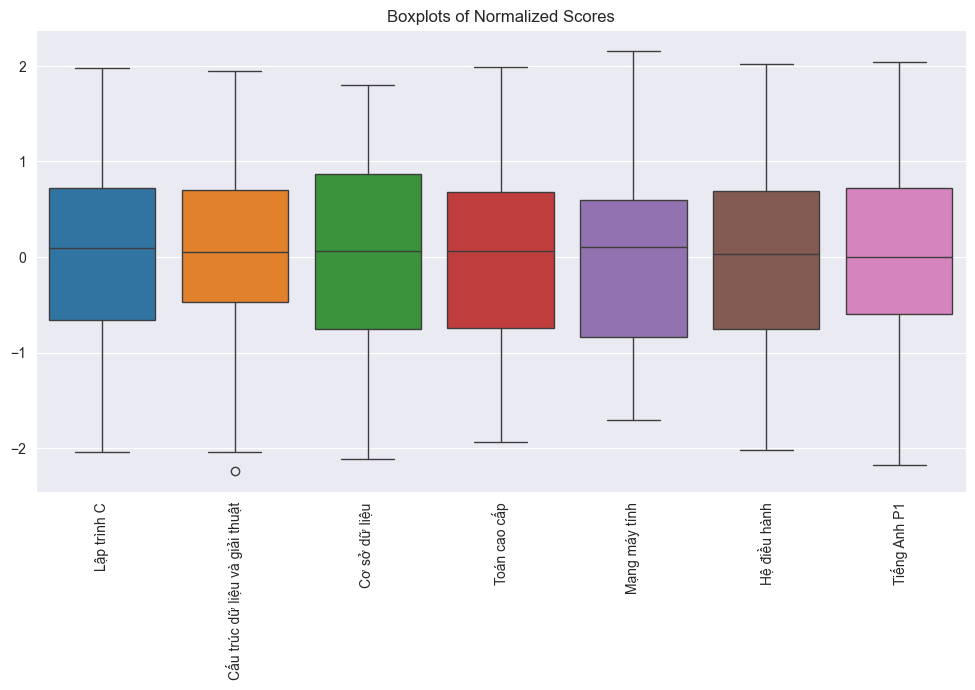

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataFrame[scoreColumns])
plt.title('Boxplots of Normalized Scores')
plt.xticks(rotation=90)
plt.show()
# plt.clf()


In [32]:
dataFrame.to_excel('RecommendationResults.xlsx', index=False)
print('Results saved.')

Results saved.


In [33]:
from joblib import dump
dump(hierarchical, 'BestModel.joblib')
print('Best model saved for website deployment.')

Best model saved for website deployment.
